In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv


In [2]:
df = pd.read_csv('/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv')
df.drop(['id', 'index', 'imdb_id'], axis=1, inplace = True)
df.head()

,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5283 non-null   object 
 1   type               5283 non-null   object 
 2   description        5278 non-null   object 
 3   release_year       5283 non-null   int64  
 4   age_certification  2998 non-null   object 
 5   runtime            5283 non-null   int64  
 6   imdb_score         5283 non-null   float64
 7   imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 330.3+ KB


In [4]:
df.isna().sum()

title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [5]:
df["age_certification"] = df["age_certification"].fillna(method='ffill')
df["imdb_votes"] = df["imdb_votes"].fillna(method='ffill')
df["description"] = df["description"].fillna(method='ffill')

In [6]:
"""
Data Analysis Quesions 
1. What is the total number of entries in the dataset, and how many unique titles are present?
2. What are the data types of each column in the dataset, and are there any missing values? If yes, how would you handle them?
3. What is the range of release years for the movies and shows, and can you identify any patterns or trends in the distribution of release years?
4. What is the average IMDb score for the movies and shows, and can you identify the top 3 movies with the highest IMDb scores?
5. How does the distribution of movie runtimes look, and are there any outliers? Also, compare the average runtime of movies with the average runtime of TV shows.
6. What are the unique age certifications present in the dataset, and can you identify any relationship between IMDb score and age certification?
7. Analyze the distribution of IMDb votes, and investigate if there is a correlation between the number of IMDb votes and the IMDb score.
8. Assuming genres are not provided, how might you infer or derive them from the available data? How would you then analyze the distribution of genres?
9. Are there any noticeable trends in IMDb scores over the years, and how would you visualize the popularity of movies and shows over time?
10. Visualize the popularity of movies and shows over time
11. Analyze IMDb votes and runtime together to identify patterns in user engagement.
12. Explore the trend of each age_rating over the years and explain the reasons. 
13. How is content on Netflix distributed between movies and TV shows?
14. What is the proportion of content released per year? Are there any noticeable trends in content production over time?
15. What is the distribution of IMDb scores for movies versus TV shows?
16. Are there any significant differences in average IMDb scores between different age certification categories?
17. What is the average runtime of movies and TV shows on Netflix?
18. How does runtime correlate with IMDb scores and audience ratings?
19. What are the most common age certification ratings on Netflix?
20. How does content distribution vary across different age certifications?
21. How do IMDb votes (indicating viewer engagement and popularity) correlate with the IMDb scores?
22. Which types of content (movies or TV shows) receive more engagement from viewers?



"""

'\nEDA questions \n1. What is the total number of entries in the dataset, and how many unique titles are present?\n2. What are the data types of each column in the dataset, and are there any missing values? If yes, how would you handle them?\n3. What is the range of release years for the movies and shows, and can you identify any patterns or trends in the distribution of release years?\n4. What is the average IMDb score for the movies and shows, and can you identify the top 3 movies with the highest IMDb scores?\n5. How does the distribution of movie runtimes look, and are there any outliers? Also, compare the average runtime of movies with the average runtime of TV shows.\n6. What are the unique age certifications present in the dataset, and can you identify any relationship between IMDb score and age certification?\n7. Analyze the distribution of IMDb votes, and investigate if there is a correlation between the number of IMDb votes and the IMDb score.\n8. Assuming genres are not prov

In [7]:
# 1. What is the total number of entries in the dataset, and how many unique titles are present?
print(f"There are total of {df.shape[0]} entries in the dataset; and {len(df['title'].unique())} unqiue titles.")

There are total of 5283 entries in the dataset; and 5237 unqiue titles.


In [8]:
# 2. What are the data types of each column in the dataset, and are there any missing values? If yes, how would you handle them?
df.isna().sum()

title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_score           0
imdb_votes           0
dtype: int64

In [9]:
# 3. What is the range of release years for the movies and shows, 
# and can you identify any patterns or trends in the distribution of release years?
df['release_year'].describe()

count    5283.000000
mean     2015.879992
std         7.346098
min      1953.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: release_year, dtype: float64

<Axes: xlabel='release_year', ylabel='Count'>

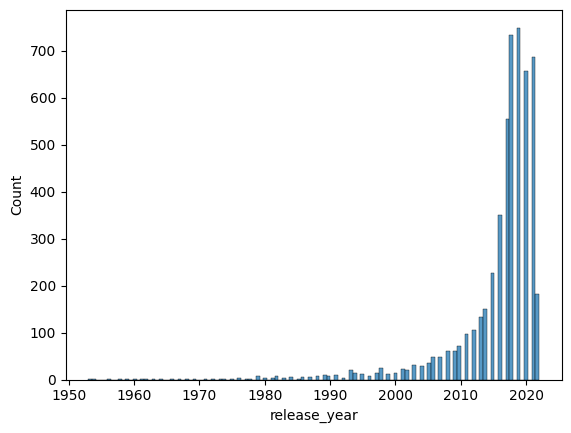

In [10]:
import seaborn as sns
sns.histplot(data = df, x='release_year')
# answer from graph: between 2010 to 2020 the titles produced increased drastically, thanks to technology development 

In [11]:
# 4. What is the average IMDb score for the movies and shows, and can you identify the top 3 movies with the highest IMDb scores?
avg_movie_score = df[df["type"]=="MOVIE"]["imdb_score"].mean()
avg_show_score = df[df["type"]=="SHOW"]["imdb_score"].mean()
print(f"Average Imdb score for movies, shows is {avg_movie_score} and {avg_show_score} respectively.\n")

print("Below are the top three movies with highest IMDB score:")
df[df["type"]=="MOVIE"].sort_values(by="IMDB_score", ascending=False)[:3]

Average imdb score for movies, shows is 6.266979747578516 and 7.017377398720683 respectively.

Below are the top 3 movies with highest imdb score:


,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
3172,David Attenborough: A Life on Our Planet,MOVIE,The story of life on our planet by the man who...,2020,PG,83,9.0,31180.0
2685,C/o Kancharapalem,MOVIE,From a schoolboyâ€™s crush to a middle-aged ba...,2018,PG,152,9.0,6562.0
24,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,R,235,9.0,943.0


Avg runtime of movies, shows is 101.53742295274435, 38.63272921108742 minutes respectively.



<Axes: >

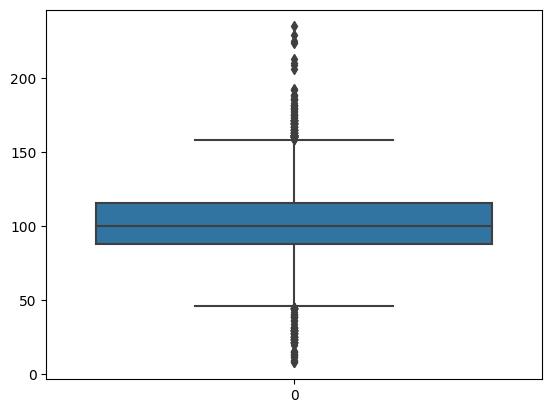

In [12]:
# 5. How does the distribution of movie runtimes look, and are there any outliers? 
# Also, compare the average runtime of movies with the average runtime of TV shows.

avg_movies_runtime = df[df["type"]=="MOVIE"]["runtime"].mean()
avg_show_runtime = df[df["type"]=="SHOW"]["runtime"].mean()
print(f"Avg runtime of movies, shows is {avg_movies_runtime}, {avg_show_runtime} minutes respectively.\n")

sns.boxplot(df[df["type"]=="MOVIE"]["runtime"])

In [13]:
# 6. What are the unique age certifications present in the dataset, 
# and can you identify any relationship between IMDb score and age certification?
df["age_certification"].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'NC-17'], dtype=object)

<Axes: xlabel='age_certification', ylabel='imdb_score'>

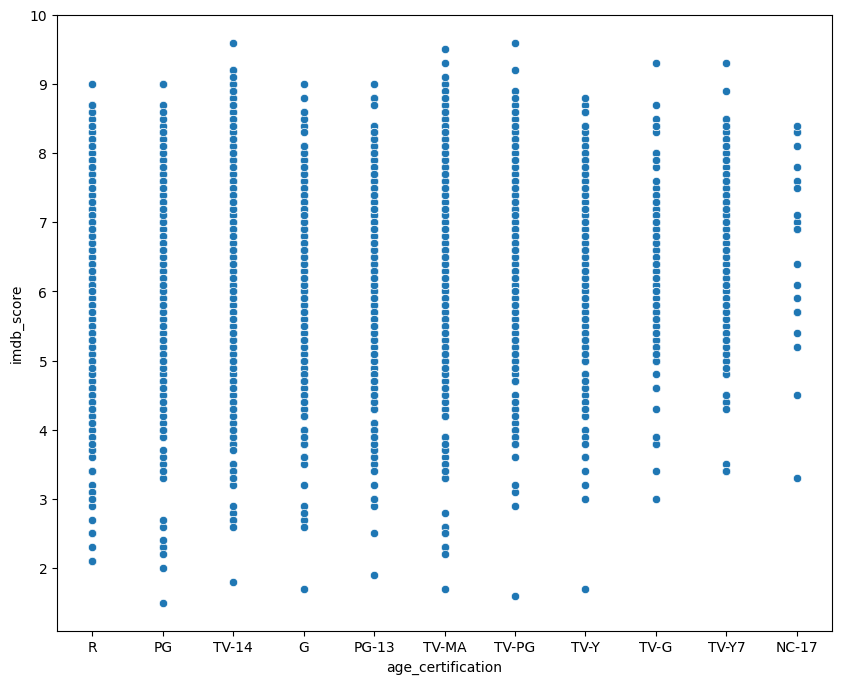

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.scatterplot(data =df, x='age_certification', y='imdb_score')

<Axes: xlabel='imdb_score', ylabel='Count'>

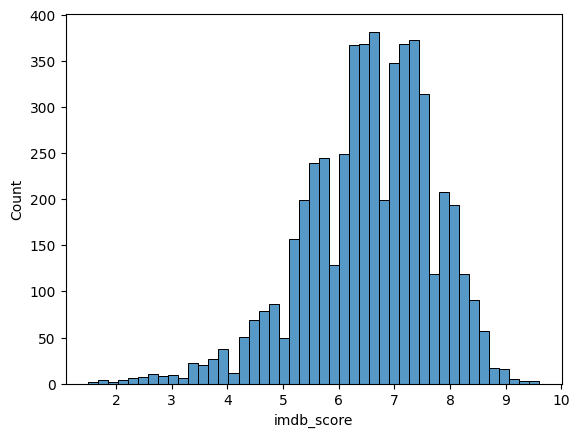

In [15]:
# 7. Analyze the distribution of IMDb votes, 
# and investigate if there is a correlation between the number of IMDb votes and the IMDb score.

sns.histplot(data = df, x='imdb_score')
# answer1: most imdb rating is between 6 to 7 range 

<Axes: >

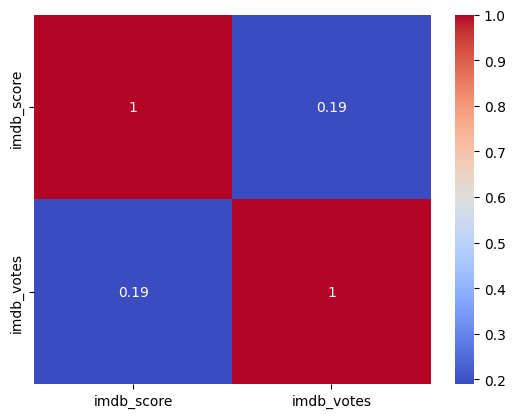

In [16]:
df_temp = df[["imdb_score", "imdb_votes"]]
sns.heatmap( df_temp.corr(), cmap='coolwarm', annot=True)
#Indicates weak positive correlation of 0.19.

In [17]:
#8 Assuming genres are not provided, how might you infer or derive them from the available data? 
# How would you then analyze the distribution of genres?

# They can be obtained from the title and description provided using NLP models which are trained on genre identification.


<Axes: xlabel='release_year', ylabel='imdb_score'>

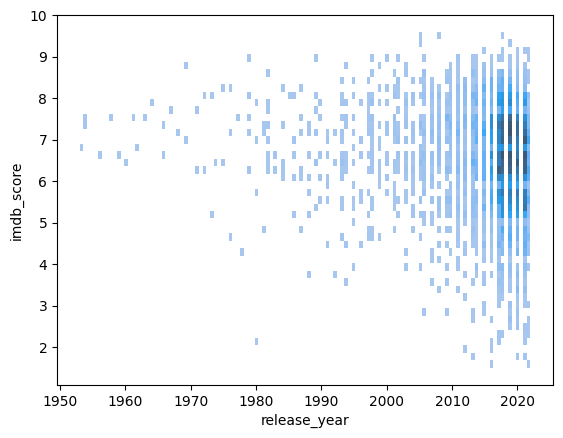

In [18]:
#9 Are there any noticeable trends in IMDb scores over the years, and how would you visualize the popularity of movies and shows over time?
sns.histplot(data=df, x='release_year', y='imdb_score')

<Axes: xlabel='release_year'>

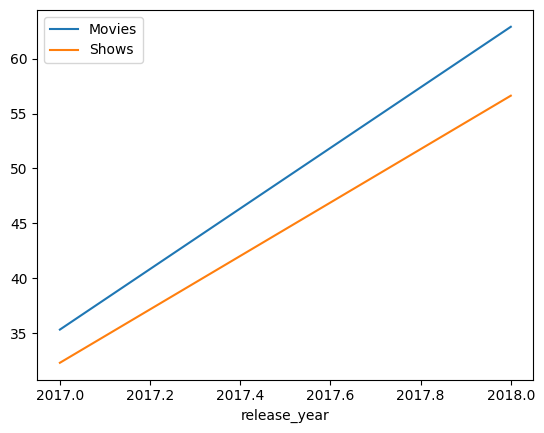

In [19]:
#10 Visualize the popularity of movies and shows over time
sns.lineplot(data=df, x='release_year', y=df[df['type'] == 'MOVIE'].groupby('release_year').size(), label='Movies',errorbar=None)
sns.lineplot(data=df, x='release_year', y=df[df['type'] == 'SHOW'].groupby('release_year').size(), label='Shows',errorbar=None)

<Axes: title={'center': 'Shows'}, xlabel='runtime', ylabel='imdb_score'>

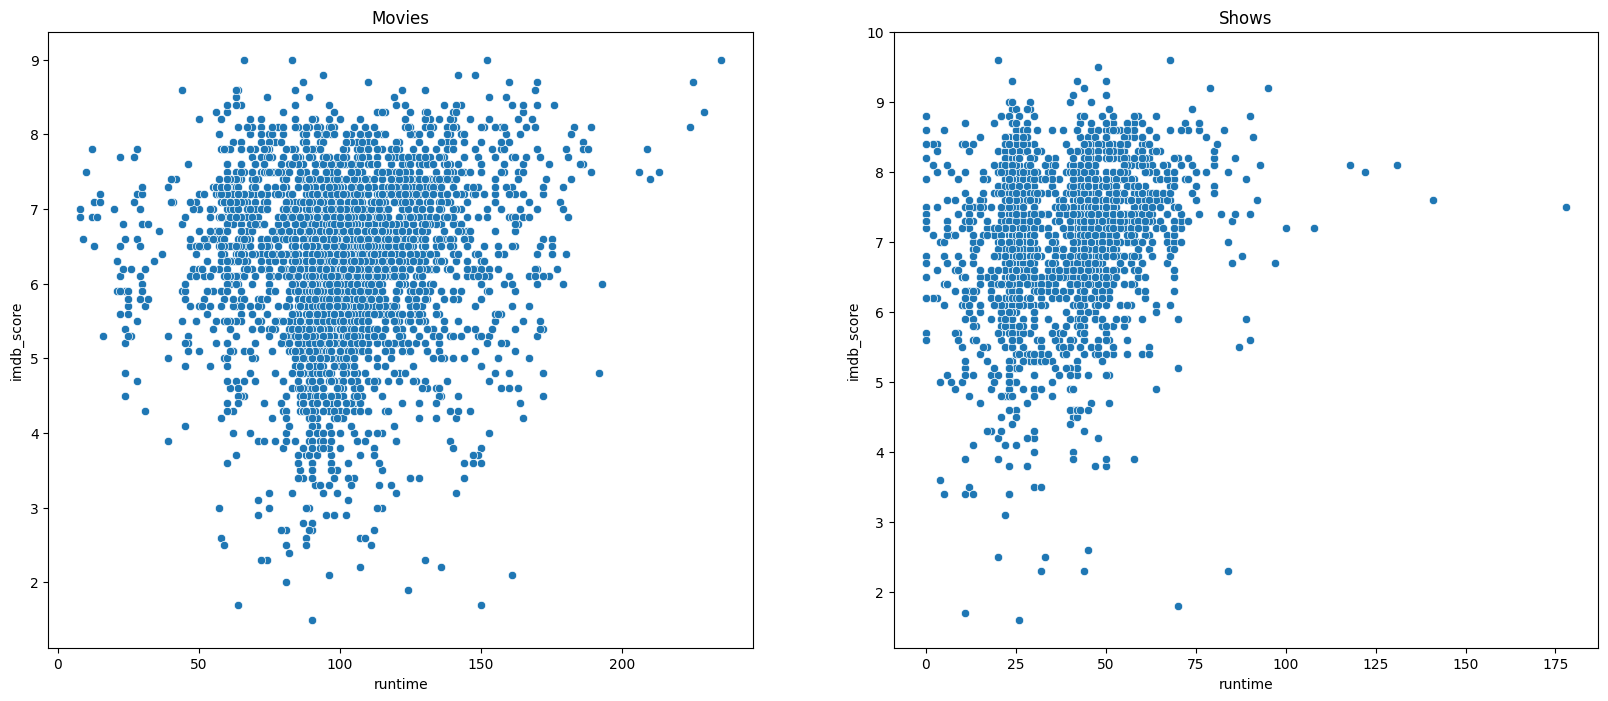

In [20]:
#11 Analyze IMDb votes and runtime together to identify patterns in user engagement.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
axes[0].set_title("Movies")
axes[1].set_title("Shows")
sns.scatterplot(data = df[df["type"]=="MOVIE"], x='runtime', y='imdb_score', ax =axes[0])
sns.scatterplot(data = df[df["type"]=="SHOW"], x='runtime', y='imdb_score', ax=axes[1])

<Axes: xlabel='age_certification', ylabel='release_year'>

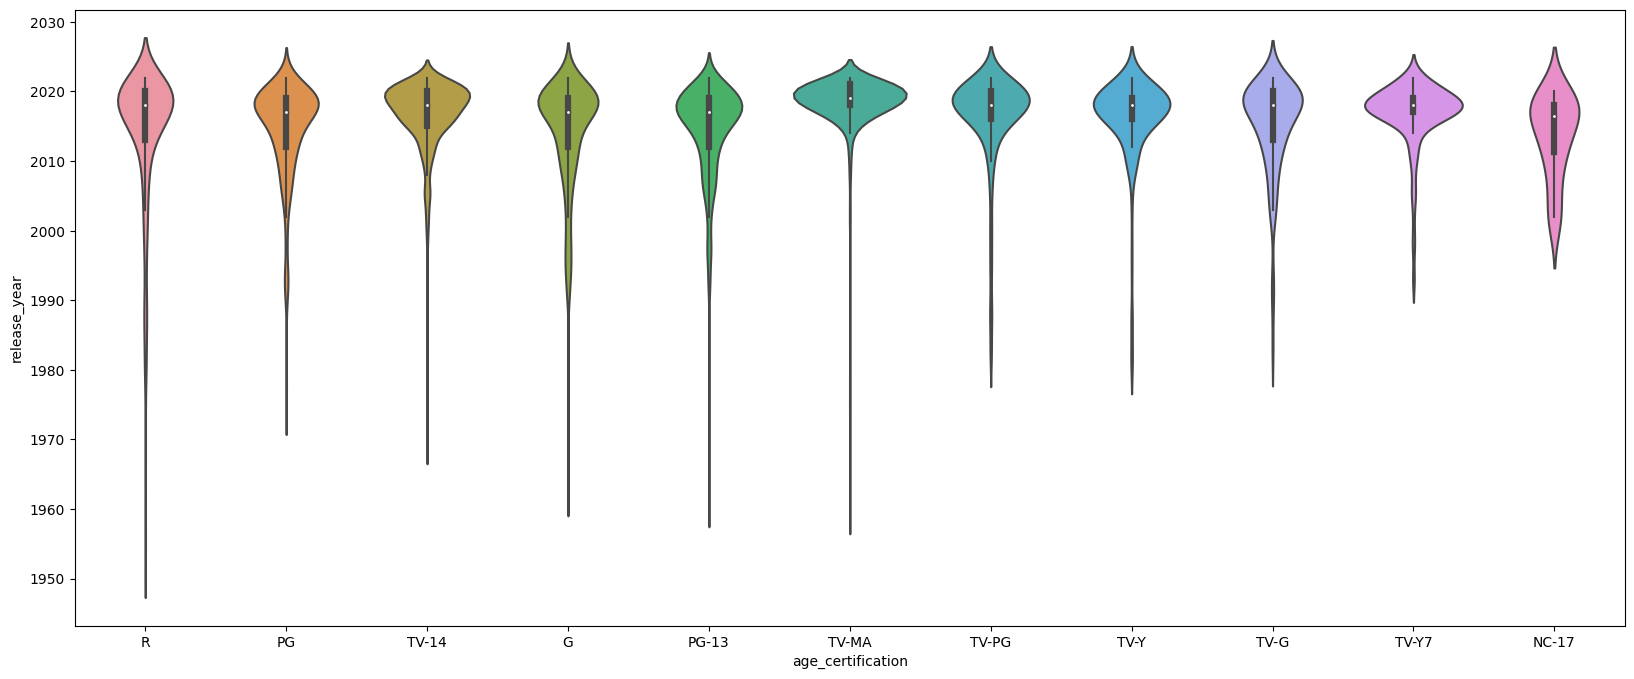

In [21]:
#12 Explore the trend of each age_rating over the years and explain the reasons.
plt.figure(figsize=(20,8))
sns.violinplot(data = df, x='age_certification', y='release_year')

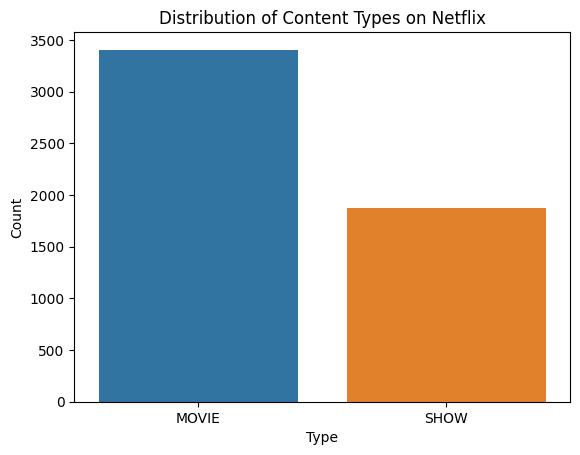

In [22]:
#13 How is content on Netflix distributed between movies and TV shows?

# Assuming df is your DataFrame
# Count the frequency of each type
type_counts = df['type'].value_counts()

# Plotting
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types on Netflix')
plt.show()

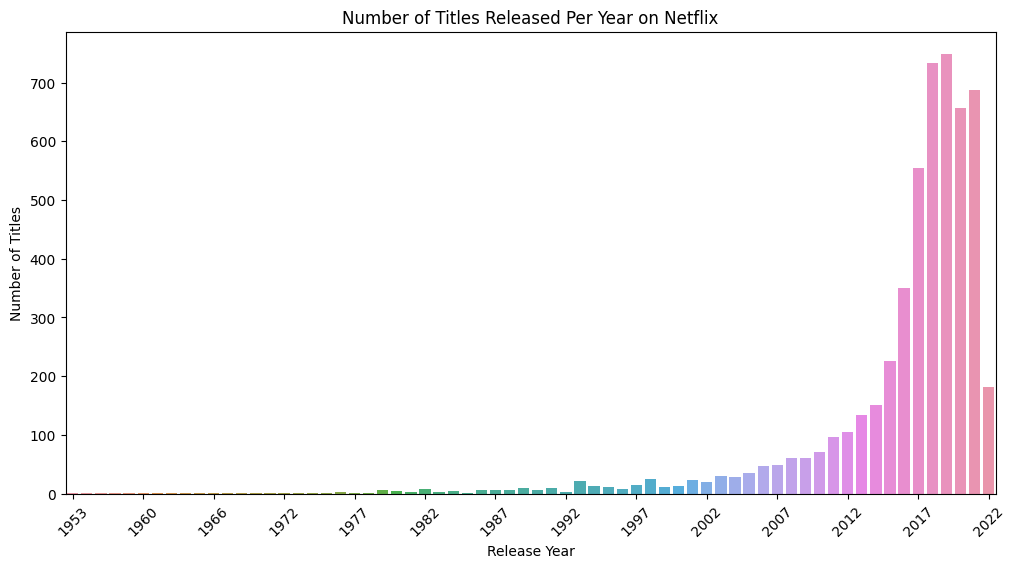

In [23]:
#14 What is the proportion of content released per year? Are there any noticeable trends in content production over time?

# Counting the number of titles released each year
year_counts = df['release_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released Per Year on Netflix')

# Adjusting x-axis ticks for better readability
plt.xticks(ticks=range(0, len(year_counts.index), 5), labels=year_counts.index[::5], rotation=45)

plt.show()

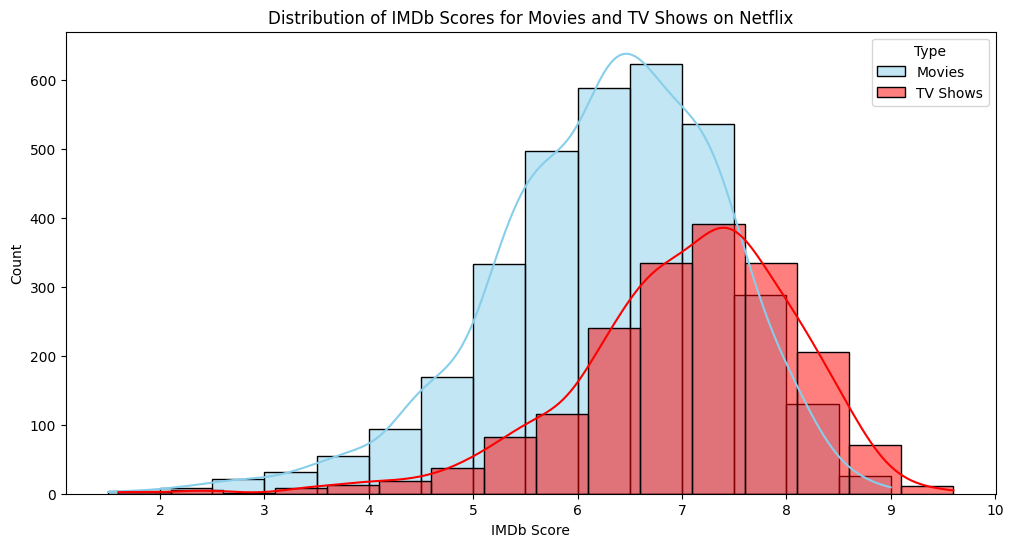

In [24]:
#15 What is the distribution of IMDb scores for movies versus TV shows?

# Separate the data into movies and TV shows
movies = df[df['type'] == 'MOVIE']
tv_shows = df[df['type'] == 'SHOW']

# Plotting the distribution of IMDb scores for movies and TV shows
plt.figure(figsize=(12, 6))
sns.histplot(movies['imdb_score'], color="skyblue", label='Movies', kde=True, binwidth=0.5)
sns.histplot(tv_shows['imdb_score'], color="red", label='TV Shows', kde=True, binwidth=0.5)

plt.xlabel('IMDb Score')
plt.ylabel('Count')
plt.title('Distribution of IMDb Scores for Movies and TV Shows on Netflix')
plt.legend(title='Type')
plt.show()

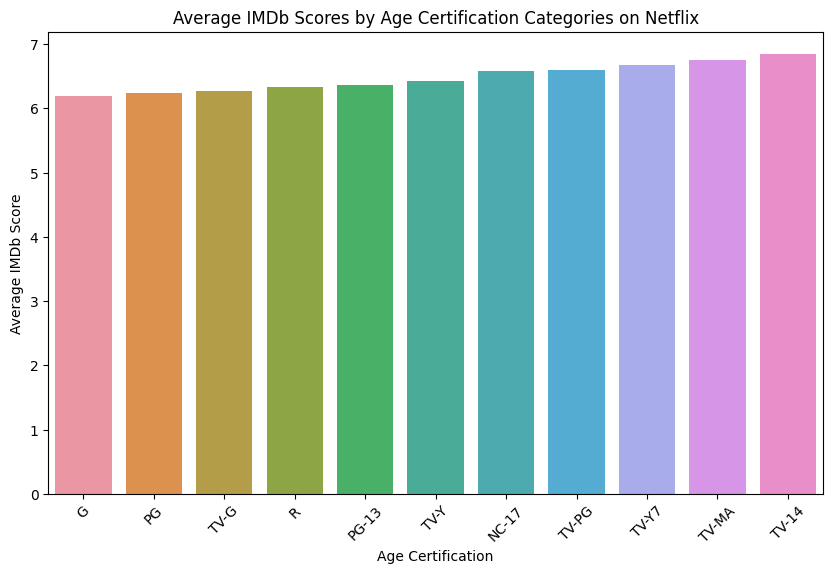

In [25]:
#16 Are there any significant differences in average IMDb scores between different age certification categories?

# Grouping the data by age certification and calculating the average IMDb score for each category
avg_imdb_by_age_certification = df.groupby('age_certification')['imdb_score'].mean()

# Sorting the results for better visualization
avg_imdb_by_age_certification_sorted = avg_imdb_by_age_certification.sort_values()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_imdb_by_age_certification_sorted.index, y=avg_imdb_by_age_certification_sorted.values)
plt.xlabel('Age Certification')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Scores by Age Certification Categories on Netflix')
plt.xticks(rotation=45)
plt.show()

In [26]:
#17 What is the average runtime of movies and TV shows on Netflix?

# Calculating the average runtime for movies
avg_runtime_movies = df[df['type'] == 'MOVIE']['runtime'].mean()

# Calculating the average runtime for TV shows
avg_runtime_tv_shows = df[df['type'] == 'SHOW']['runtime'].mean()

# Displaying the results
print(f"Average runtime for movies: {avg_runtime_movies} minutes")
print(f"Average runtime for TV shows: {avg_runtime_tv_shows} minutes")

Average runtime for movies: 101.53742295274435 minutes
Average runtime for TV shows: 38.63272921108742 minutes


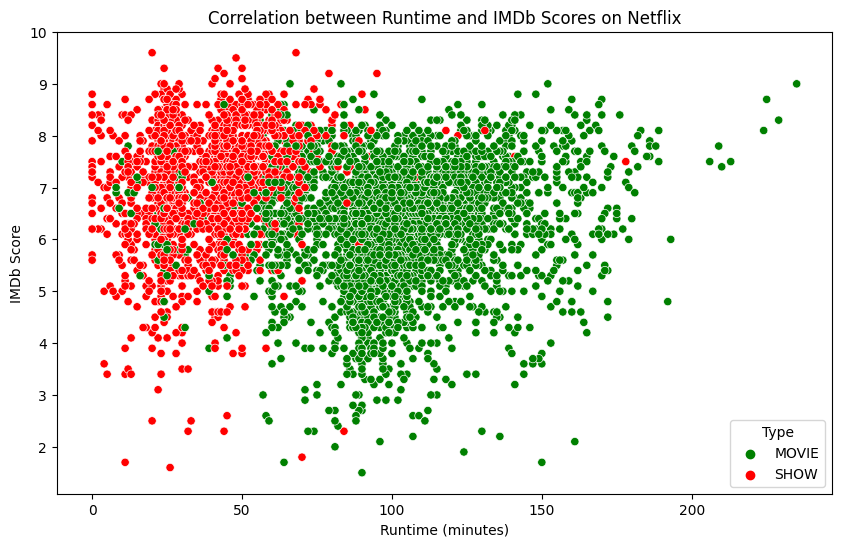

In [27]:
#18 How does runtime correlate with IMDb scores and audience ratings?

# Adjusting the scatter plot: using circular dots as markers with distinct colors for movies (blue) and shows (red)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='runtime', y='imdb_score', hue='type', palette={'MOVIE': 'green', 'SHOW': 'red'}, marker='o')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Score')
plt.title('Correlation between Runtime and IMDb Scores on Netflix')
plt.legend(title='Type')
plt.show()

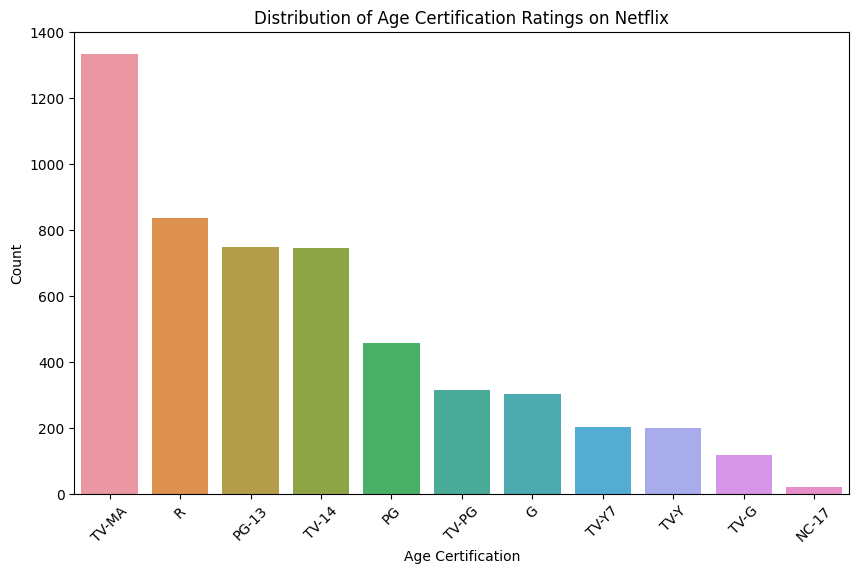

In [28]:
#19 What are the most common age certification ratings on Netflix?

# Counting the frequency of each age certification rating
age_certification_counts = df['age_certification'].value_counts()

# Plotting the distribution of age certification ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=age_certification_counts.index, y=age_certification_counts.values)
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Distribution of Age Certification Ratings on Netflix')
plt.xticks(rotation=45)
plt.show()

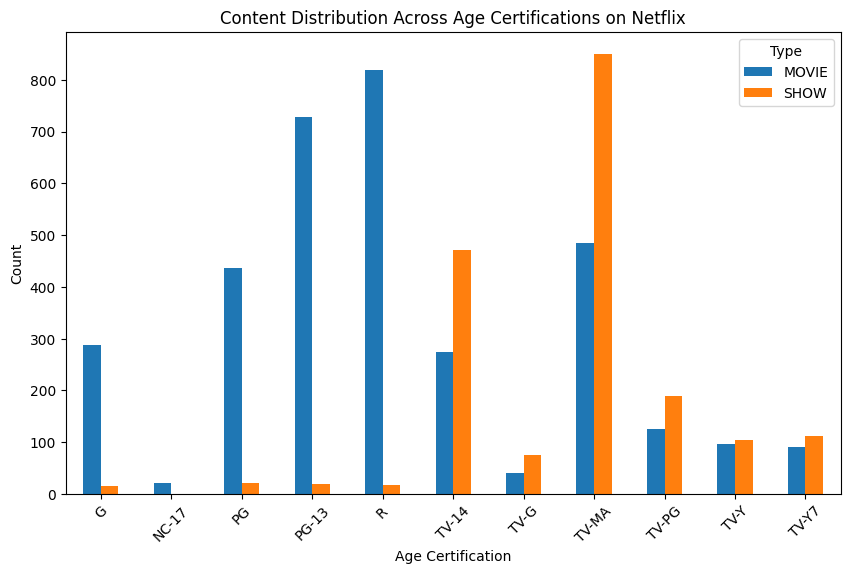

In [29]:
#20 How does content distribution vary across different age certifications?

# Grouping the data by age certification and type, then counting the occurrences
age_certification_content_distribution = df.groupby(['age_certification', 'type']).size().unstack()

# Plotting the distribution
age_certification_content_distribution.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.title('Content Distribution Across Age Certifications on Netflix')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

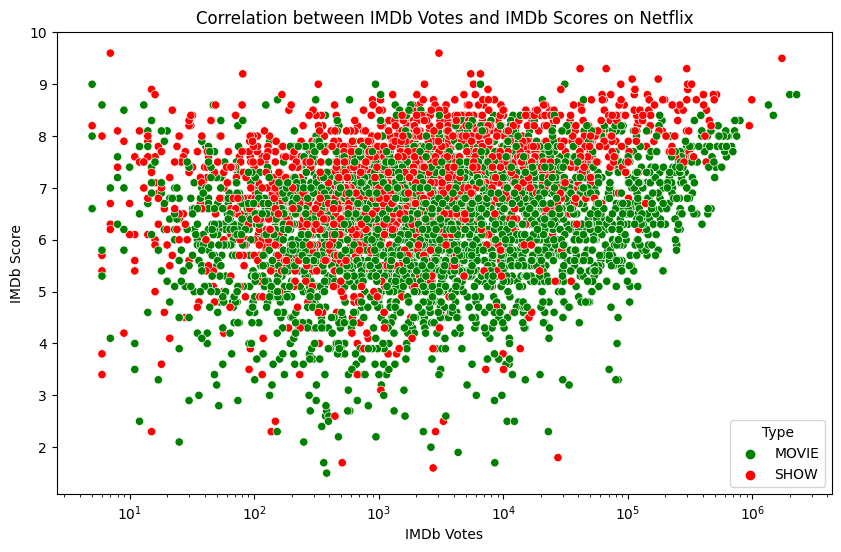

In [30]:
#21 How do IMDb votes (indicating viewer engagement and popularity) correlate with the IMDb scores?

# Adjusting the scatter plot: using blue for movies and red for TV shows
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imdb_votes', y='imdb_score', hue='type', palette={'MOVIE': 'green', 'SHOW': 'red'})
plt.xlabel('IMDb Votes')
plt.ylabel('IMDb Score')
plt.title('Correlation between IMDb Votes and IMDb Scores on Netflix')
plt.xscale('log')  # Using a logarithmic scale for IMDb votes
plt.legend(title='Type')
plt.show()

In [31]:
#22 Which types of content (movies or TV shows) receive more engagement from viewers?

# Calculating the average number of IMDb votes for movies and TV shows
avg_votes_movies = df[df['type'] == 'MOVIE']['imdb_votes'].mean()
avg_votes_tv_shows = df[df['type'] == 'SHOW']['imdb_votes'].mean()

print(f"Average IMDb votes for movies on Netflix: {avg_votes_movies:.2f}")
print(f"Average IMDb votes for TV shows on Netflix: {avg_votes_tv_shows:.2f}")

Average IMDb votes for movies on Netflix: 26578.24
Average IMDb votes for TV shows on Netflix: 17485.56


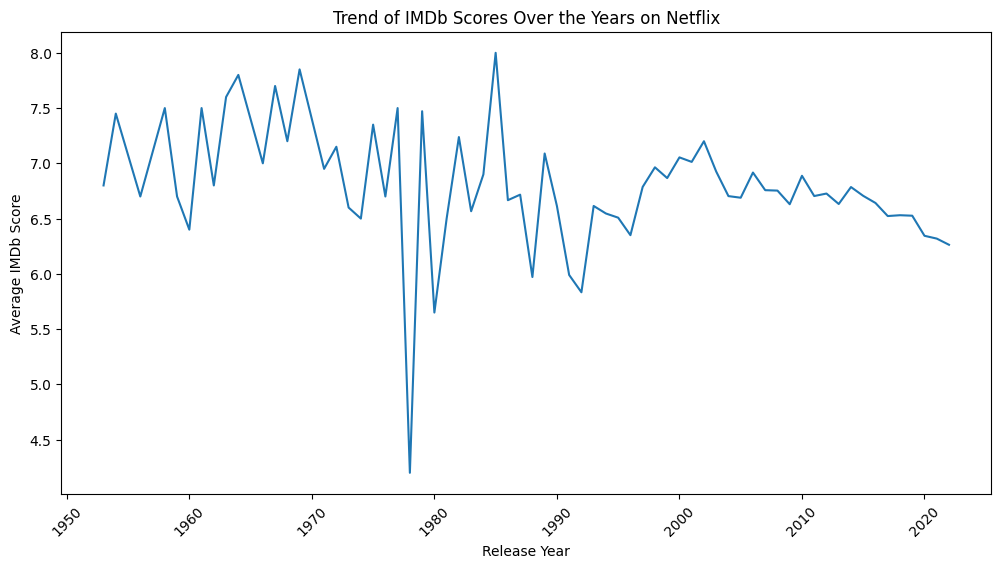

In [32]:
#23 How has the quality of content (as indicated by IMDb scores) changed over the years?

# Grouping the data by release year and calculating the average IMDb score for each year
avg_imdb_by_year = df.groupby('release_year')['imdb_score'].mean()

# Plotting the trend of IMDb scores over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_imdb_by_year.index, y=avg_imdb_by_year.values)
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.title('Trend of IMDb Scores Over the Years on Netflix')
plt.xticks(rotation=45)
plt.show()

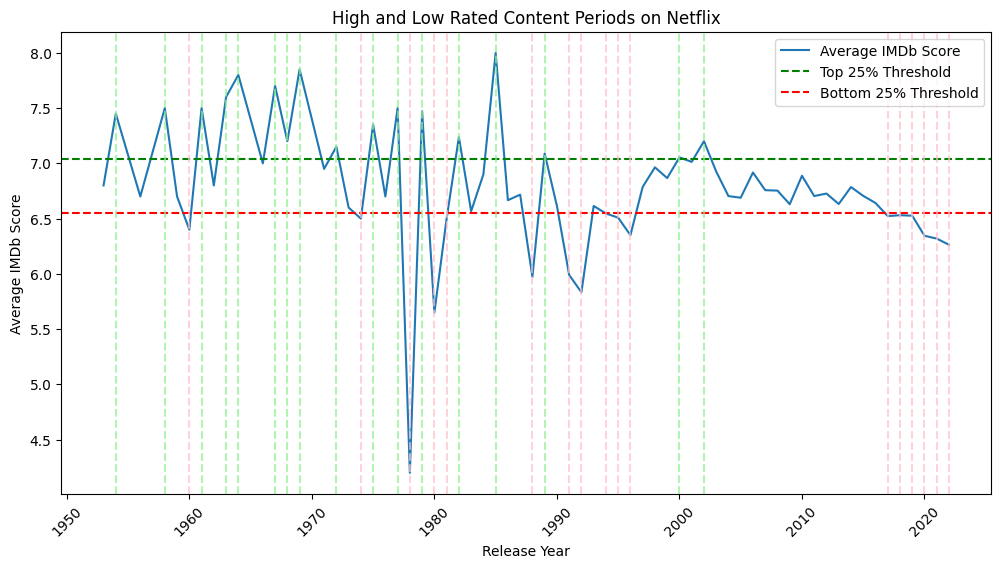

In [33]:
#24 Are there certain periods or years where Netflix released particularly high-rated or low-rated content?

# Identifying years with particularly high or low average IMDb scores
# Using quantiles to define 'high' and 'low' rated content
high_rating_threshold = avg_imdb_by_year.quantile(0.75)  # Top 25%
low_rating_threshold = avg_imdb_by_year.quantile(0.25)  # Bottom 25%

# Years with high-rated content
high_rated_years = avg_imdb_by_year[avg_imdb_by_year >= high_rating_threshold]
# Years with low-rated content
low_rated_years = avg_imdb_by_year[avg_imdb_by_year <= low_rating_threshold]

# Plotting the trend again with annotations for high and low-rated years
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_imdb_by_year.index, y=avg_imdb_by_year.values, label='Average IMDb Score')
plt.axhline(high_rating_threshold, color='green', linestyle='--', label='Top 25% Threshold')
plt.axhline(low_rating_threshold, color='red', linestyle='--', label='Bottom 25% Threshold')

# Highlighting the specific years
for year in high_rated_years.index:
    plt.axvline(year, color='lightgreen', linestyle='--', alpha=0.7)
for year in low_rated_years.index:
    plt.axvline(year, color='pink', linestyle='--', alpha=0.7)

plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.title('High and Low Rated Content Periods on Netflix')
plt.xticks(rotation=45)
plt.legend()
plt.show()
